In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-reviews/amazon_review_polarity_csv.tgz
/kaggle/input/amazon-reviews/train.csv
/kaggle/input/amazon-reviews/test.csv


In [2]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.draw.dispersion import dispersion_plot

In [3]:
data = "/kaggle/input/amazon-reviews/test.csv"

df = pd.read_csv(data)
    
df.describe()

,2
count,399999.000000
mean,1.499999
std,0.500001
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [4]:
df.head()

,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...


In [5]:
title = df['Great CD']
print(title[4])

DVD Player crapped out after one year


In [6]:
description = df['My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"']
print(description[4])

I also began having the incorrect disc problems that I've read about on here. The VCR still works, but hte DVD side is useless. I understand that DVD players sometimes just quit on you, but after not even one year? To me that's a sign on bad quality. I'm giving up JVC after this as well. I'm sticking to Sony or giving another brand a shot.


[0.6666666666666666, 0.3333333333333333, 0.5714285714285714, 0.5, 0.7142857142857143, 0.0, 0.75, 0.6666666666666666, 0.25, 0.6, 0.0, 0.0, 0.25, 0.7142857142857143, 0.0, 0.2857142857142857, 0.16666666666666666, 0.2, 0.38461538461538464, 0.3333333333333333, 0.6666666666666666, 0.7, 0.3333333333333333, 0.4, 0.3333333333333333, 0.5, 0.0, 0.3333333333333333, 0.2857142857142857, 0.8571428571428571, 0.5, 0.4, 0.9166666666666666, 0.125, 0.3333333333333333, 0.0, 0.14285714285714285, 0.3333333333333333, 0.4, 0.5, 0.0, 0.8, 0.42857142857142855, 0.0, 0.75, 0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 0.625, 0.5]


Text(0.5, 1.0, 'histogram of proportion of words in the title that are also in the description')

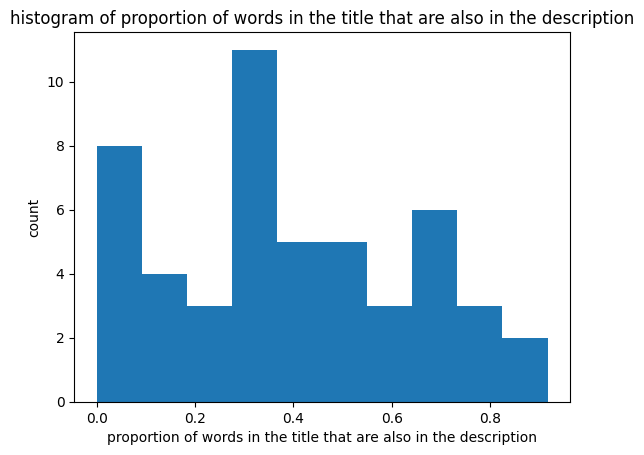

In [7]:
lista = []
for i in range(50):
    count = 0
    wordlist = title[i].split()
    for j in range(len(wordlist)):
        if wordlist[j] in description[i]:
            #print(wordlist[j])
            count+=1
    lista.append(count/len(wordlist))
print(lista)
plt.hist(lista)
plt.xlabel("proportion of words in the title that are also in the description")
plt.ylabel("count")
plt.title("histogram of proportion of words in the title that are also in the description")

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[93.71000000000001, 86.68, 0.0, 75.19, -35.06, -6.38, 56.14, 29.599999999999998, 96.33, 64.86, 64.86, 18.64, 97.04, -44.97, -11.07, 96.46000000000001, 92.35, 0.0, 93.71000000000001, -38.04, -22.919999999999998, 72.64, 85.88, 85.16, 47.67, 51.370000000000005, 41.730000000000004, 29.599999999999998, 54.50000000000001, 92.60000000000001, -7.720000000000001, 98.83999999999999, 93.14, 73.50999999999999, 11.34, 82.21000000000001, -32.22, 99.53999999999999, 97.87, -88.42, 0.0, 83.95, 97.66, 37.940000000000005, 86.86, -80.97, -97.48, -61.970000000000006, 81.47999999999999, -45.5, -77.08, 88.22, -92.86, 62.49, 12.85, 83.77, 90.2, 84.42, 25.0, 43.74, -50.94, 98.0, 84.42, 15.299999999999999, -89.34, 93.22, 77.63, 87.22999999999999, 93.65, 79.12, 72.45, -86.09, 55.19, 22.720000000000002, -87.28, -62.580000000000005, -18.16, -84.72, -7.720000000000001, 85.91, 5.16, 76.78, -45.45, -98.45, -22.99, 79.91, -80.5, 52.42, 95.59, 57.89, -42.15, -45.550000000000004, 51.82, -17.79, 71.84, 80.11, -85.19, -74

Text(0.5, 1.0, 'histogram of sentiment values of descriptions')

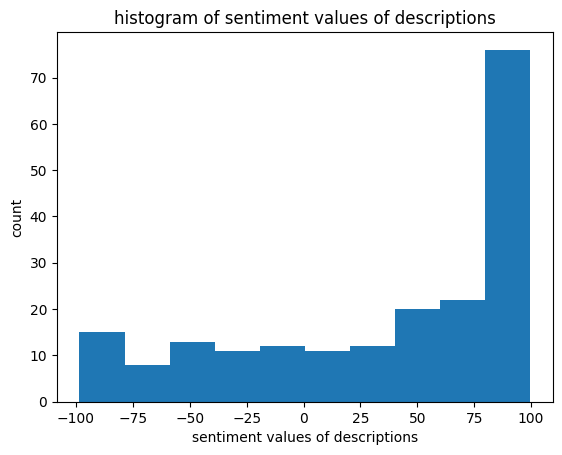

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

listt = []
for i in range(200):
    sentiment_dict = sia.polarity_scores(description[i])
    #print("Overall sentiment dictionary is : ", sentiment_dict)
    #print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    #print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    #print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    #print("sentence was rated as ", sentiment_dict['compound'], "as an overall compound score")
    listt.append(sentiment_dict['compound']*100)
print(listt)
    # The negative, neutral, and positive scores are related: They all add up to 1 and can’t be negative. 
    #The compound score is calculated differently. It’s not just an average, and it can range from -1 to 1.
plt.hist(listt)
plt.xlabel("sentiment values of descriptions")
plt.ylabel("count")
plt.title("histogram of sentiment values of descriptions")

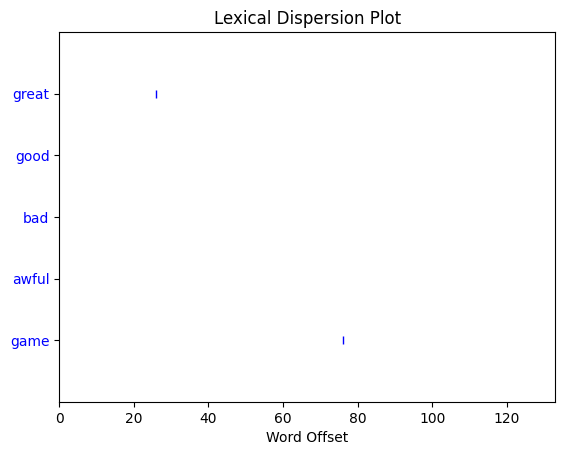

In [9]:
from nltk.draw.dispersion import dispersion_plot
import matplotlib.pyplot as plt

from nltk.text import Text
wordlist = Text(description[0].split(" "))

targets=['great','good','bad','awful','game']
plt.xlim(0, len(wordlist))
plt.yticks([0,1,2,3,4], reversed(targets), color="C0") #make the labels correct
dispersion_plot(wordlist, targets, ignore_case=True, title='Lexical Dispersion Plot')